In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

<Axes: >

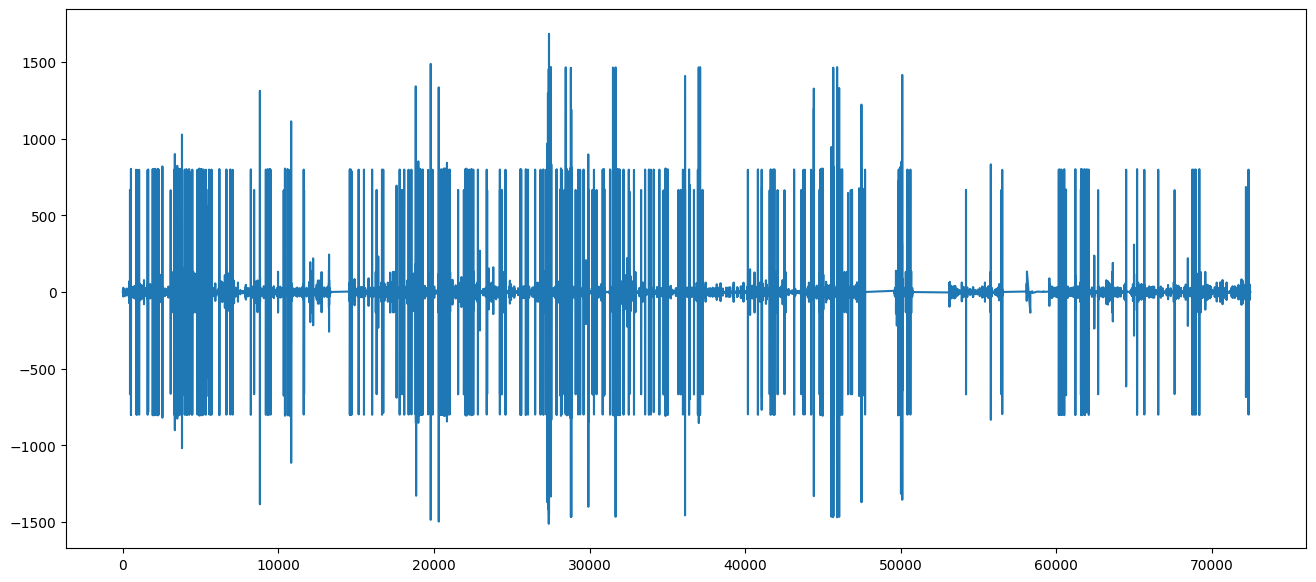

In [10]:
ping_data = pd.read_csv('./data/ping_data_rp59adf374.csv')
ping_data = ping_data[ping_data['local_avg'] < 2000]
ping_data = ping_data[ping_data['remote_avg'] < 2000]
local_avg = pd.Series(ping_data['local_avg'])
local_avg.diff().fillna(local_avg).plot(figsize=(16, 7))

<Axes: >

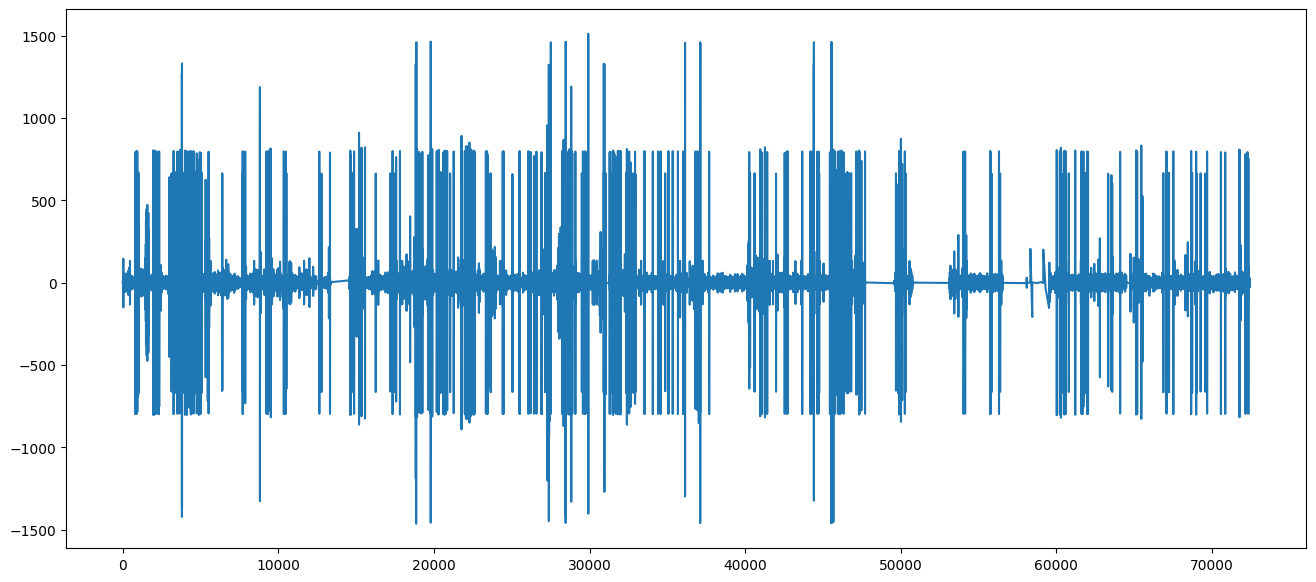

In [11]:
remote_avg = pd.Series(ping_data['remote_avg'])
remote_avg.diff().fillna(remote_avg).plot(figsize=(16, 7))

0         NaN
1         NaN
2    1.813333
3    0.896667
4    1.126667
5    1.080000
6    1.110000
7    0.940000
8    1.223333
9    1.190000
Name: local_avg, dtype: float64


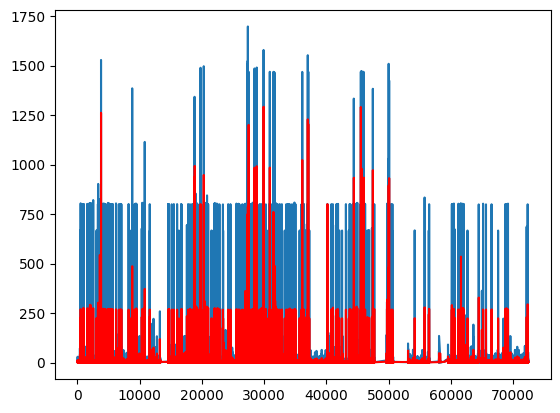

In [12]:
# Tail-rolling average transform
rolling = local_avg.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
local_avg.plot()
rolling_mean.plot(color='red')
plt.show()

In [13]:
df = pd.DataFrame(local_avg.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

       mean   t-1   t+1
0       NaN   NaN  4.39
1       NaN  4.39  0.49
2       NaN  0.49  0.56
3       NaN  0.56  1.64
4  1.813333  1.64  1.18
5  0.896667  1.18  0.42
6  1.126667  0.42  1.73
7  1.080000  1.73  0.67
8  1.110000  0.67  1.27
9  0.940000  1.27  1.63


predicted=1.813333, expected=1.640000
predicted=4.863333, expected=1.700000
predicted=0.243333, expected=0.350000
predicted=0.643333, expected=0.450000
predicted=11.630000, expected=13.030000
predicted=2.593333, expected=0.680000
predicted=0.886667, expected=3.400000
predicted=1.170000, expected=6.990000
predicted=0.410000, expected=0.470000
predicted=0.880000, expected=1.340000
predicted=0.880000, expected=0.200000
predicted=1.160000, expected=1.040000
predicted=0.563333, expected=0.160000
predicted=0.453333, expected=0.840000
predicted=0.683333, expected=0.250000
predicted=0.550000, expected=0.480000
predicted=0.306667, expected=1.220000
predicted=13.190000, expected=0.400000
predicted=6.556667, expected=0.170000
predicted=2.453333, expected=0.550000
predicted=0.860000, expected=0.190000
predicted=0.260000, expected=1.570000
predicted=1.076667, expected=0.290000
predicted=0.656667, expected=2.060000
predicted=1.003333, expected=1.620000
predicted=0.450000, expected=0.150000
predicted

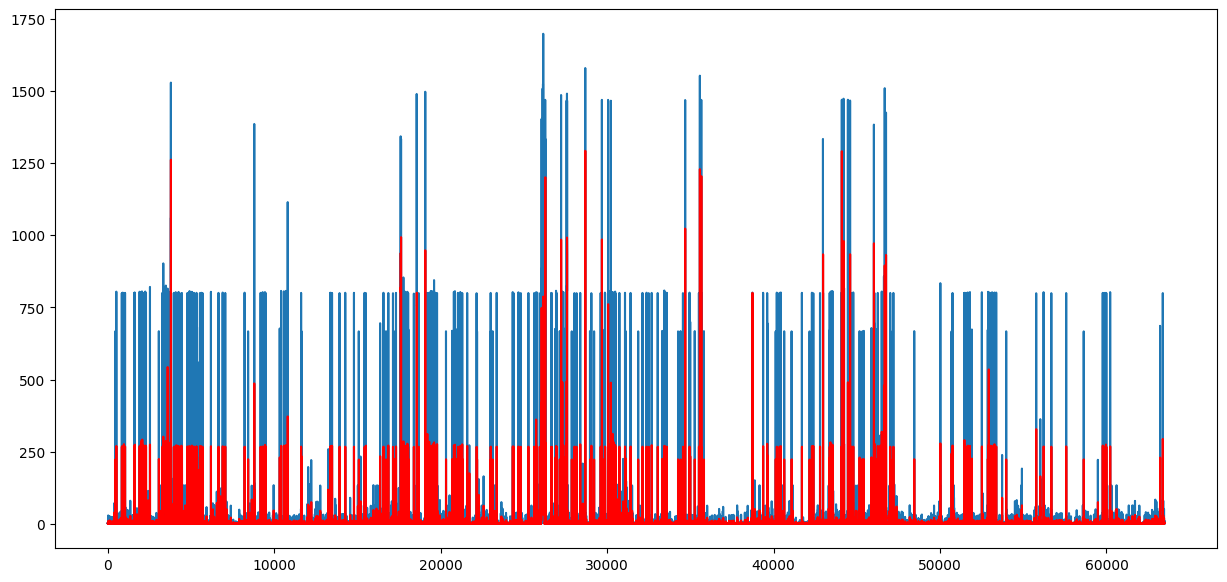

In [14]:
X = local_avg.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if t % 1000 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

0          NaN
1          NaN
2    11.383333
3    11.486667
4     8.926667
5     8.956667
6     8.710000
7     8.556667
8     9.380000
9     9.853333
Name: remote_avg, dtype: float64


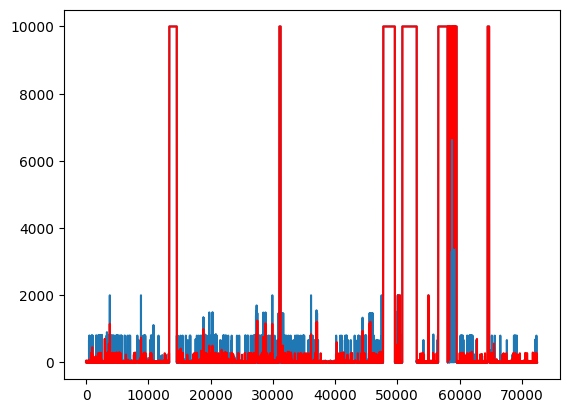

In [7]:
# Tail-rolling average transform
rolling = remote_avg.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
local_avg.plot()
rolling_mean.plot(color='red')
plt.show()

In [15]:
df = pd.DataFrame(remote_avg.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

        mean    t-1    t+1
0        NaN    NaN   9.09
1        NaN   9.09  16.75
2        NaN  16.75   8.31
3        NaN   8.31   9.40
4  11.383333   9.40   9.07
5  11.486667   9.07   8.40
6   8.926667   8.40   8.66
7   8.956667   8.66   8.61
8   8.710000   8.61  10.87
9   8.556667  10.87  10.08


predicted=11.383333, expected=9.400000
predicted=231.926667, expected=10.280000
predicted=9.610000, expected=8.460000
predicted=31.473333, expected=10.130000
predicted=13.096667, expected=11.810000
predicted=9.570000, expected=11.600000
predicted=8.686667, expected=10.770000
predicted=9.073333, expected=10.740000
predicted=9.316667, expected=9.830000
predicted=11.133333, expected=10.650000
predicted=23.073333, expected=8.730000
predicted=9.053333, expected=9.220000
predicted=10.350000, expected=9.780000
predicted=11.993333, expected=9.340000
predicted=38.466667, expected=7.970000
predicted=16.876667, expected=9.820000
predicted=8.840000, expected=8.150000
predicted=63.596667, expected=7.780000
predicted=21.723333, expected=9.350000
predicted=27.126667, expected=9.210000
predicted=10.960000, expected=31.820000
predicted=8.810000, expected=9.160000
predicted=10.993333, expected=8.330000
predicted=10.313333, expected=9.450000
predicted=11.353333, expected=8.120000
predicted=8.943333, expe

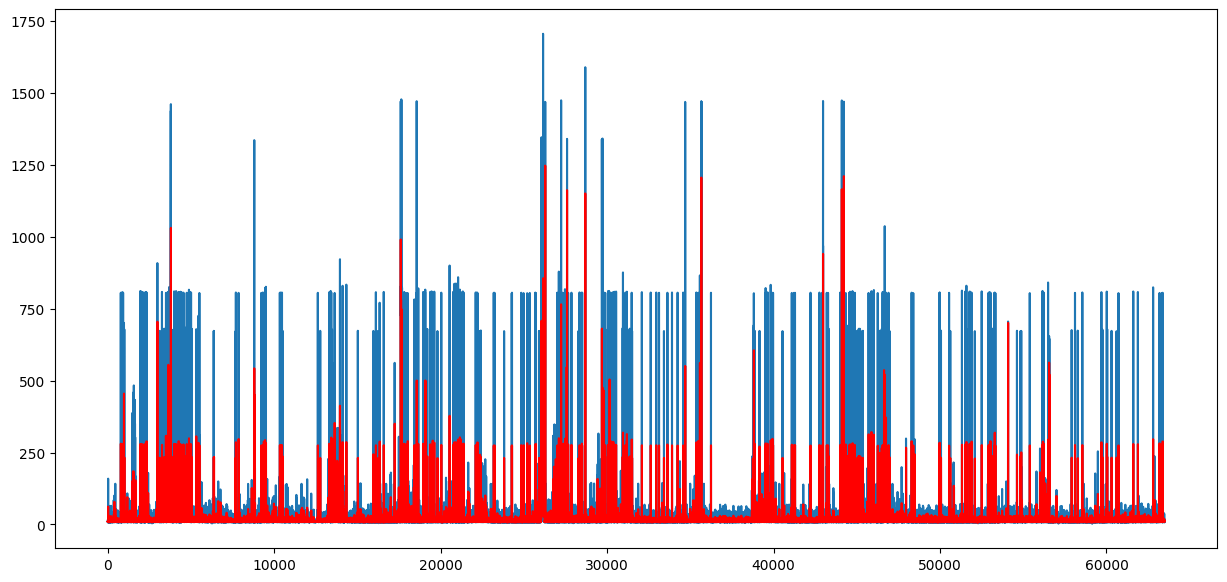

In [16]:
X = remote_avg.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if t % 1000 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()